In [12]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

np.random.seed(42)
plt.style.use('../style.mpl')

In [2]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 1139 nodes and 17908 edges


In [3]:
nx.is_connected(G)

True

In [4]:
eccentricity = nx.eccentricity(G)
periphery = nx.periphery(G)
radius = nx.radius(G)
# the diameter of networks is the maximum eccentricy
diameter = nx.diameter(G)
degree = nx.degree(G)

degree_centrality = nx.degree_centrality(G)
weighted_degree_centrality = dict(G.degree(weight='weight'))
closeness_centrality =  nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

print(f"Eccentricity: {eccentricity}")
print(f"Periphery: {periphery}")
print(f"Radius: {radius}")
print(f"Diameter: {diameter}")
print(f"Degree: {degree}")
print(f"Degree Centrality: {degree_centrality}")
print(f"Closeness Centrality: {closeness_centrality}")
print(f"Betweenness Centrality: {betweenness_centrality}")
print(f"Eigenvector Centrality: {eigenvector_centrality}")

Eccentricity: {'Intro': 5, 'Jonas Blue': 5, 'Beyoncé': 5, 'Judas Priest': 5, 'Nohidea': 6, 'Marvin Gaye': 5, 'E-40': 5, 'Lil Pump': 5, 'Rob Zombie': 4, 'Good Charlotte': 5, 'Meek Mill': 5, 'Grouplove': 5, 'Rich Homie Quan': 5, 'Oh Wonder': 6, 'Zedd': 5, 'Logic': 5, 'Dire Straits': 4, 'The Killers': 5, 'Rick Springfield': 6, 'The Goo Goo Dolls': 5, 'Usher': 5, 'Nat King Cole': 5, 'Goldfinger': 5, 'Trans-Siberian Orchestra': 5, 'Lord Huron': 6, 'My Morning Jacket': 5, 'Stacy Lattisaw': 5, 'Vic Mensa': 5, 'Tank': 5, 'Seinabo Sey': 6, 'Kruder & Dorfmeister': 5, 'Burl Ives': 5, 'Casey Donahew': 6, 'Pearl Jam': 5, 'Nelly': 5, 'Ludacris': 5, 'Ledisi': 5, 'Lime': 5, 'Chase Rice': 5, 'James "Al" Hendrix': 6, 'John Legend': 5, 'Barenaked Ladies': 5, 'Johnny Mathis': 5, 'Colbie Caillat': 5, 'Michael Calfan': 5, 'Sam Feldt': 5, 'Survivor': 5, 'Tal Bachman': 5, 'Grace Mitchell': 5, 'Matchbox Twenty': 5, 'The Darkness': 6, 'Shakey Graves': 5, 'Sam Hunt': 5, 'Bryan Adams': 5, '+44': 5, 'Third Eye Bli

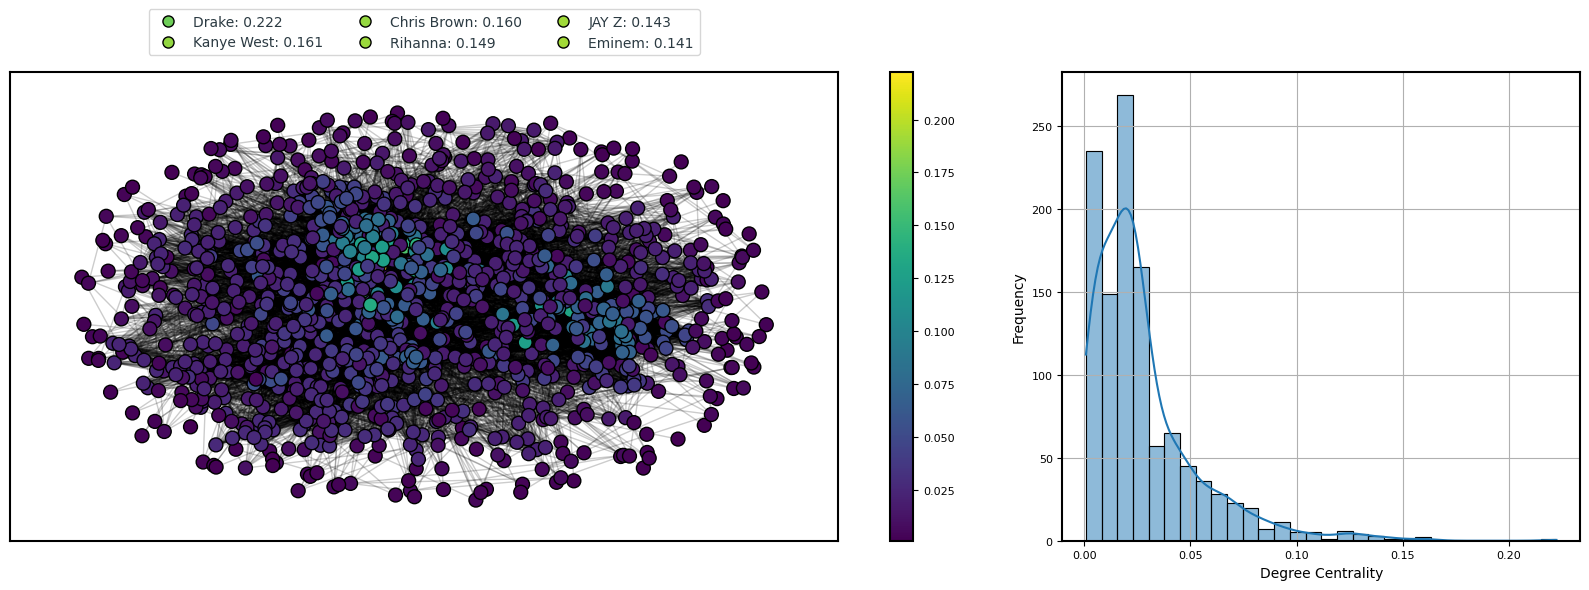

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

degree_centrality_values = list(degree_centrality.values())

pos_degree_centrality = nx.spring_layout(G, seed=42, k=0.6)
color = list(dict(degree_centrality).values())

nx.draw_networkx_edges(G, pos=pos_degree_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_degree_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_6_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:6]

top_6 = [degree_centrality[node] for node, _ in top_6_nodes]
top_6_colors = [plt.cm.viridis_r(color) for color in top_6]

legend_handles = [
    mpl.lines.Line2D(
        [0], [0],
        label=f"{node}: {centrality:.3f}",
        marker='o',
        markerfacecolor=color,
        markeredgecolor='black',
        markersize=8,
        linestyle='None'
    )
    for (node, centrality), color in zip(top_6_nodes, top_6_colors)
]
axes[0].legend(handles=legend_handles, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=True)

sns.histplot(degree_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Degree Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/degree-centrality.png", transparent=True)
plt.show()

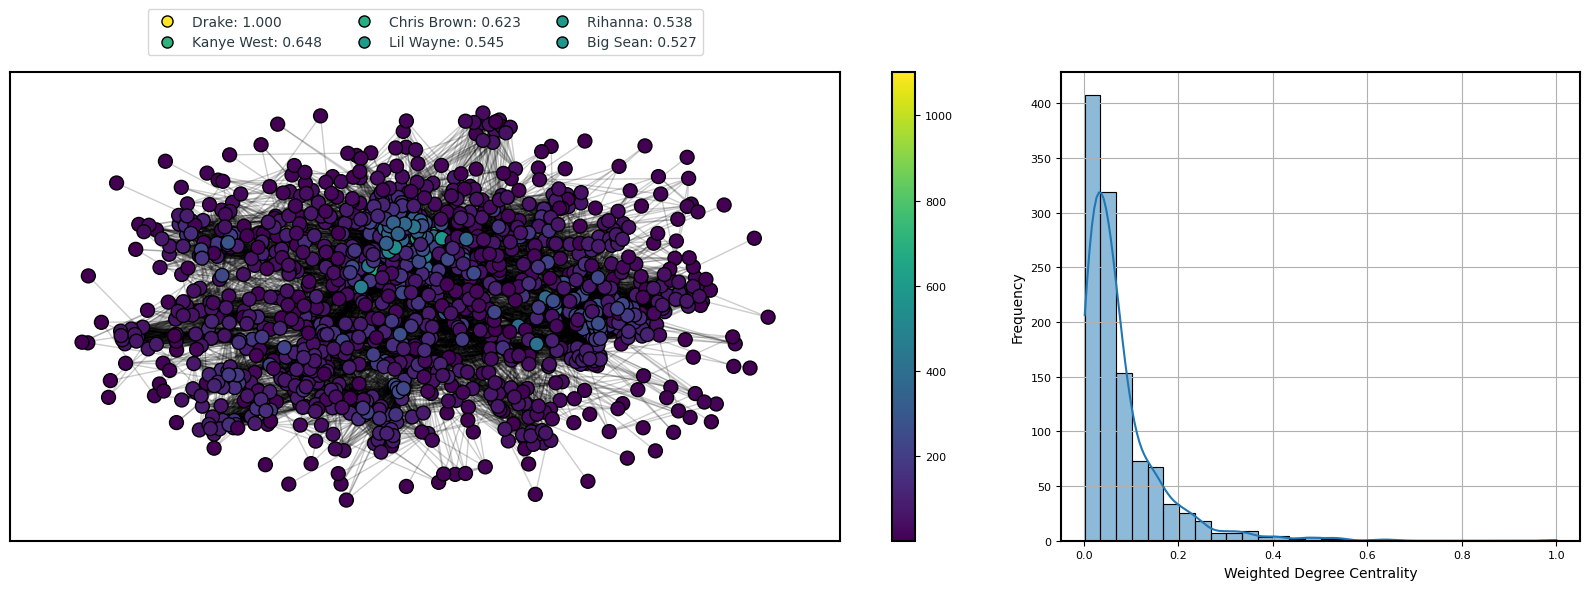

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_weighted_degree_centrality = nx.spring_layout(G, seed=42, k=0.4)
color = list(dict(weighted_degree_centrality).values())

nx.draw_networkx_edges(G, pos=pos_weighted_degree_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_weighted_degree_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

weighted_degree_centrality_values = list(weighted_degree_centrality.values())
max_weighted_degree_centrality = max(weighted_degree_centrality_values)
weighted_degree_centrality_values = [v / max_weighted_degree_centrality for v in weighted_degree_centrality_values]

weighted_degree_centrality = dict(zip(weighted_degree_centrality.keys(), weighted_degree_centrality_values))

top_6_nodes = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:6]

sns.histplot(weighted_degree_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Weighted Degree Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

top_6 = [weighted_degree_centrality[node] for node, _ in top_6_nodes]
top_6_colors = [plt.cm.viridis(color) for color in top_6]

legend_handles = [
    mpl.lines.Line2D(
        [0], [0],
        label=f"{node}: {centrality:.3f}",
        marker='o',
        markerfacecolor=color,
        markeredgecolor='black',
        markersize=8,
        linestyle='None'
    )
    for (node, centrality), color in zip(top_6_nodes, top_6_colors)
]
axes[0].legend(handles=legend_handles, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=True)

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/weighted-degree-centrality.png", transparent=True)
plt.show()

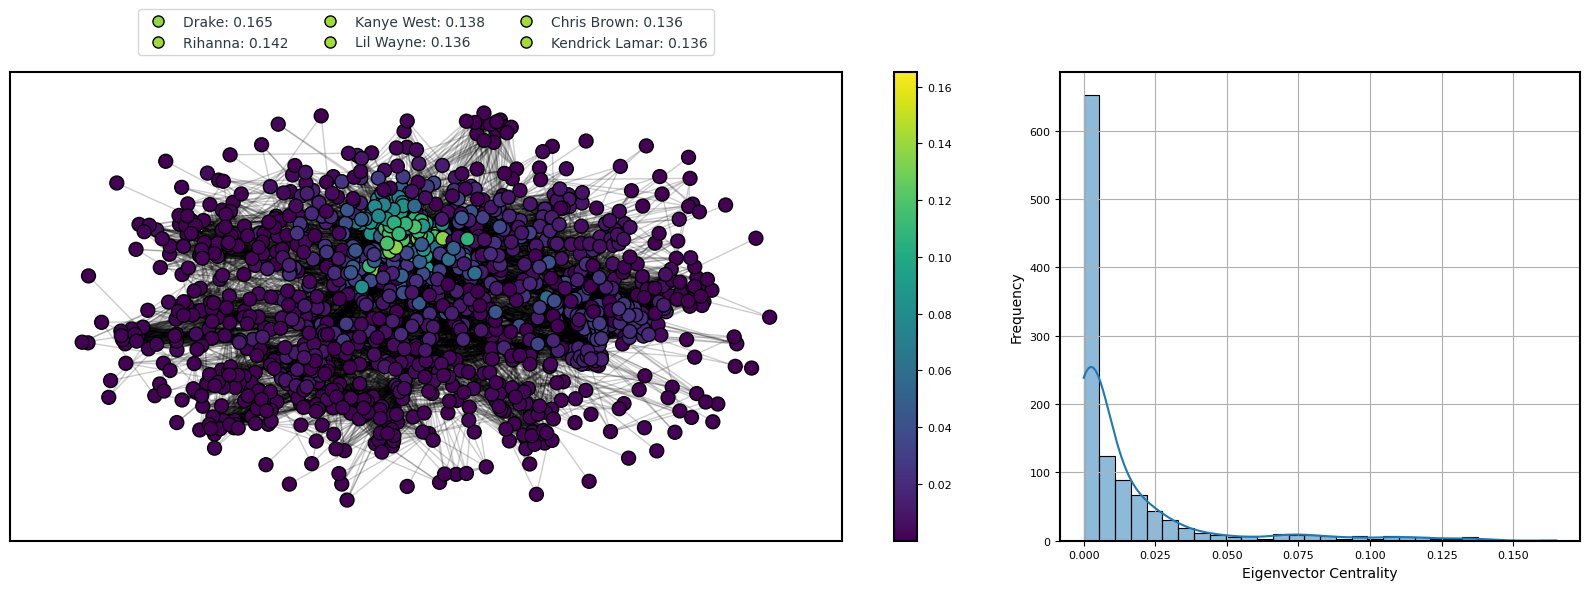

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_eigen_centrality = nx.spring_layout(G, seed=42, k=0.4)
color = list(dict(eigenvector_centrality).values())

nx.draw_networkx_edges(G, pos=pos_eigen_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_eigen_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_6_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:6]
top_6 = [eigenvector_centrality[node] for node, _ in top_6_nodes]
top_6_colors = [plt.cm.viridis_r(color) for color in top_6]

legend_handles = [
    mpl.lines.Line2D(
        [0], [0],
        label=f"{node}: {centrality:.3f}",
        marker='o',
        markerfacecolor=color,
        markeredgecolor='black',
        markersize=8,
        linestyle='None'
    )
    for (node, centrality), color in zip(top_6_nodes, top_6_colors)
]
axes[0].legend(handles=legend_handles, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=True)

eigenvector_centrality_values = list(eigenvector_centrality.values())

sns.histplot(eigenvector_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Eigenvector Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/eigenvector-centrality.png", transparent=True)
plt.show()

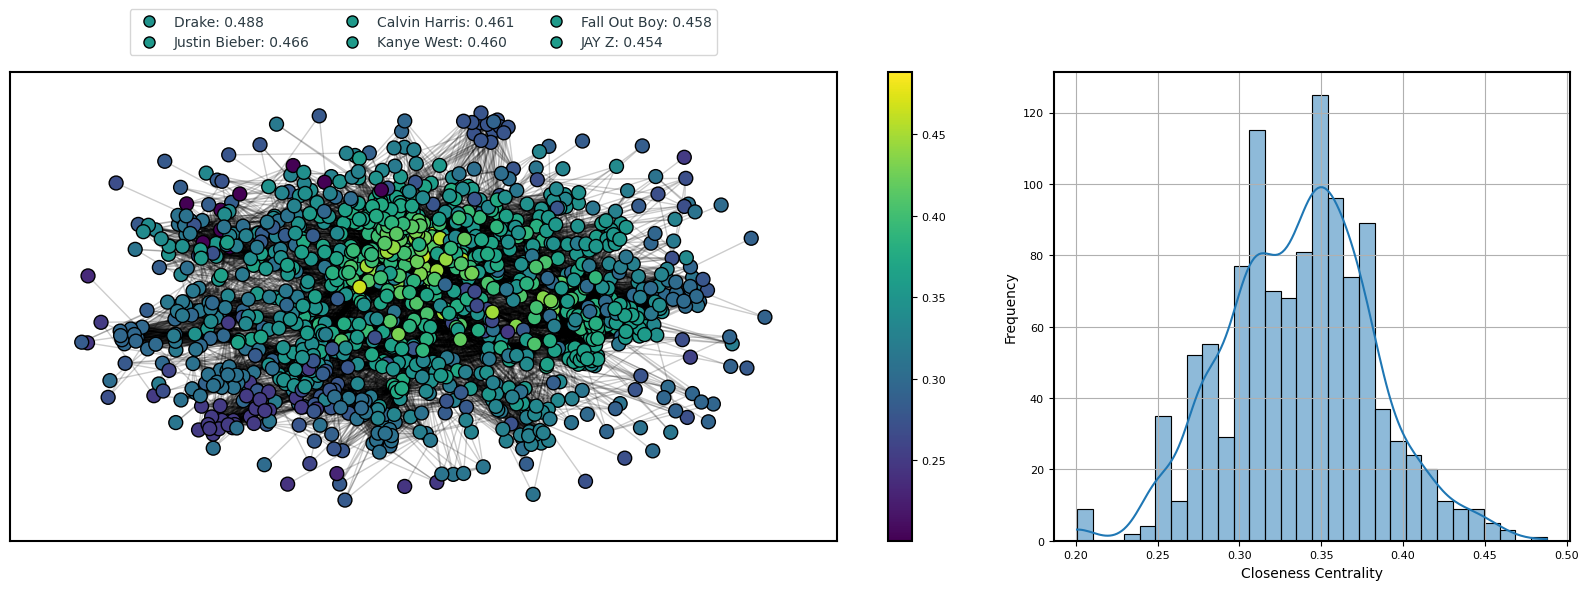

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_closeness_centrality = nx.spring_layout(G, seed=42, k=0.4)
color = list(dict(closeness_centrality).values())

nx.draw_networkx_edges(G, pos=pos_closeness_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_closeness_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_6_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:6]
top_6 = [closeness_centrality[node] for node, _ in top_6_nodes]
top_6_colors = [plt.cm.viridis_r(color) for color in top_6]

legend_handles = [
    mpl.lines.Line2D(
        [0], [0],
        label=f"{node}: {centrality:.3f}",
        marker='o',
        markerfacecolor=color,
        markeredgecolor='black',
        markersize=8,
        linestyle='None'
    )
    for (node, centrality), color in zip(top_6_nodes, top_6_colors)
]
axes[0].legend(handles=legend_handles, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=True)

closeness_centrality_values = list(closeness_centrality.values())

sns.histplot(closeness_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Closeness Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/closeness-centrality.png", transparent=True)
plt.show()

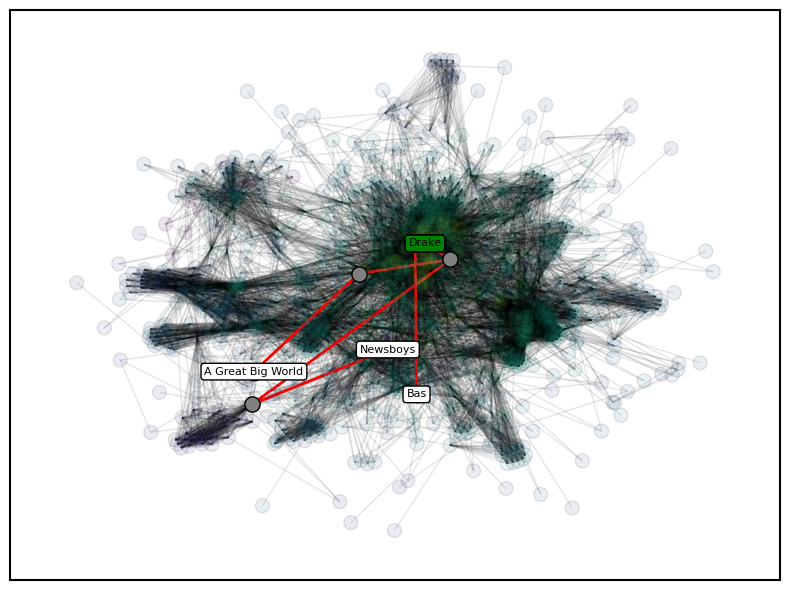

In [9]:
fig, axes = plt.subplots(1, 1)

pos = nx.spring_layout(G, seed=42, k=0.3)
node_centrality = dict(closeness_centrality)
color = list(node_centrality.values())

nx.draw_networkx_edges(G, pos=pos, alpha=0.1)
nx.draw_networkx_nodes(
    G, pos=pos, node_color=color, cmap=plt.cm.viridis,
    edgecolors='black', node_size=100, alpha=0.1
)

top_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

valid_targets = [
    n for n in G.nodes()
    if n != top_node and len(nx.shortest_path(G, source=top_node, target=n)) > 2
]

random_targets = np.random.choice(valid_targets, size=3)

nx.draw_networkx_nodes(
    G, pos=pos, nodelist=[top_node], node_color='blue',
    edgecolors='black', node_size=160, alpha=1
)

nx.draw_networkx_nodes(
    G, pos=pos, nodelist=random_targets, node_color='green',
    edgecolors='black', node_size=140, alpha=1
)

intermediary_nodes = set()
for target in random_targets:
    path = nx.shortest_path(G, source=top_node, target=target)
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=2)
    intermediary_nodes.update(path[1:-1])

intermediary_nodes -= set([top_node])
intermediary_nodes -= set(random_targets)

nx.draw_networkx_nodes(
    G, pos=pos, nodelist=list(intermediary_nodes),
    node_color='gray', edgecolors='black', node_size=120, alpha=1
)

labels = {top_node: str(top_node)}
labels.update({target: str(target) for target in random_targets})

nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=8, verticalalignment='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# redraw source node label with green color
nx.draw_networkx_labels(
    G, pos=pos, labels={top_node: str(top_node)},
    font_size=8, verticalalignment='center',
    bbox=dict(facecolor='green', edgecolor='black', boxstyle='round,pad=0.3')
)

plt.tight_layout()
plt.savefig("../plots/closeness-centrality-sp.png", transparent=True)
plt.show()

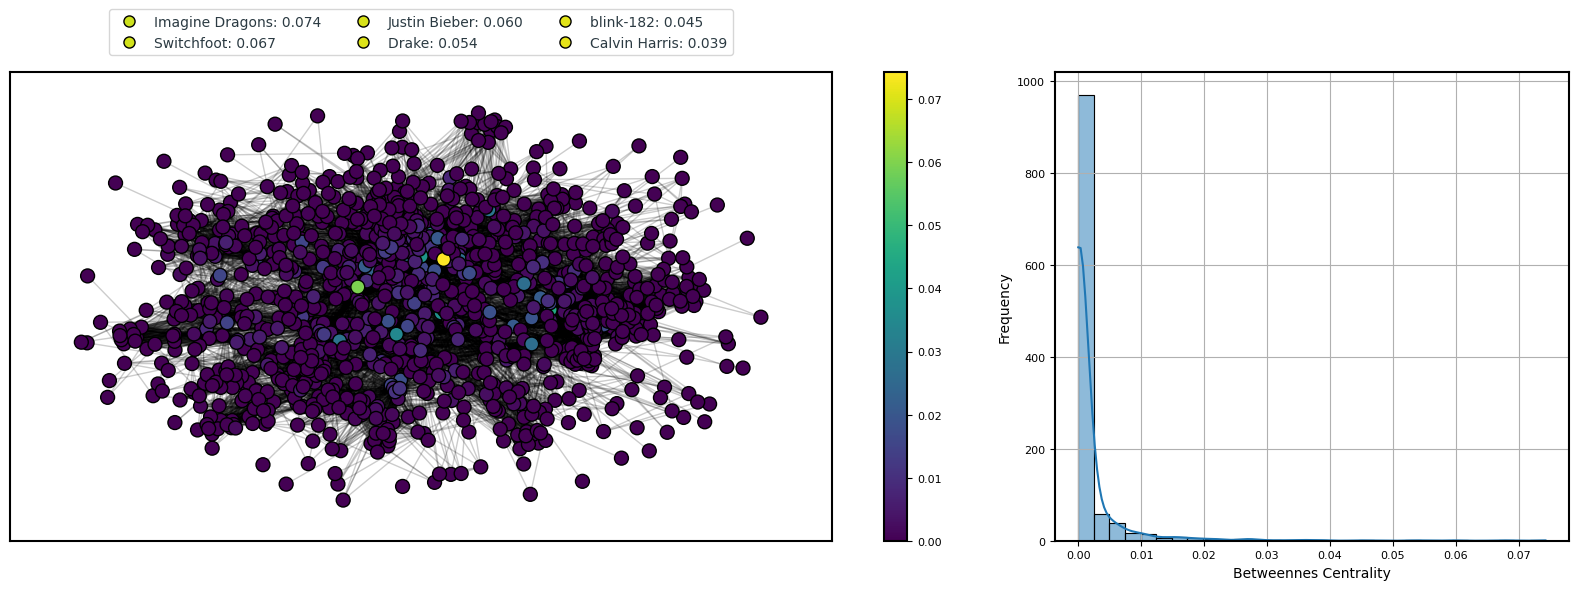

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 2]})

pos_betweenness_centrality = nx.spring_layout(G, seed=42, k=0.4)
color = list(dict(betweenness_centrality).values())

nx.draw_networkx_edges(G, pos=pos_betweenness_centrality, alpha=0.2, ax=axes[0])
nodes = nx.draw_networkx_nodes(G, pos=pos_betweenness_centrality, node_color=color, cmap=plt.cm.viridis, edgecolors='black', ax=axes[0], node_size=100)

top_6_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:6]
top_6 = [betweenness_centrality[node] for node, _ in top_6_nodes]
top_6_colors = [plt.cm.viridis_r(color) for color in top_6]

legend_handles = [
    mpl.lines.Line2D(
        [0], [0],
        label=f"{node}: {centrality:.3f}",
        marker='o',
        markerfacecolor=color,
        markeredgecolor='black',
        markersize=8,
        linestyle='None'
    )
    for (node, centrality), color in zip(top_6_nodes, top_6_colors)
]
axes[0].legend(handles=legend_handles, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15), frameon=True)

betweenness_centrality_values = list(betweenness_centrality.values())

sns.histplot(betweenness_centrality_values, ax=axes[1], fill=True, bins=30, kde=True)
axes[1].set_xlabel("Betweennes Centrality")
axes[1].set_ylabel("Frequency")
axes[1].grid()

plt.colorbar(nodes)
plt.tight_layout()
plt.savefig("../plots/betweennes-centrality.png", transparent=True)
plt.show()

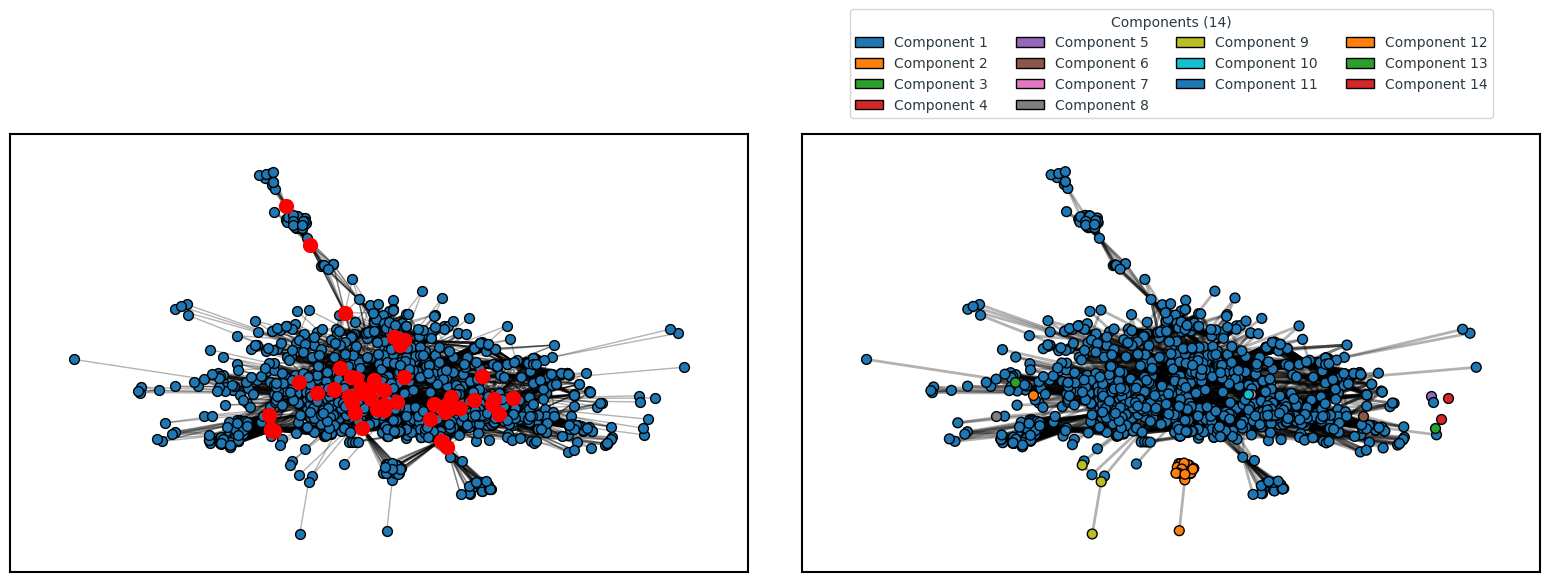

In [15]:
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:50]  
top_nodes = [node for node, _ in top_betweenness]
subset_nodes = set(top_nodes)
for node in top_nodes:
    neighbors = list(G.neighbors(node))
    subset_nodes.update(neighbors)
    for neighbor in neighbors:
        subset_nodes.update(G.neighbors(neighbor))

G_subset = G.subgraph(subset_nodes)

plt.figure(figsize=(16, 6))

pos = nx.spring_layout(G_subset, seed=42)

plt.subplot(1, 2, 1)
nx.draw_networkx_edges(G_subset, pos, alpha=0.3, edge_color='black')

non_bridge_nodes = [n for n in G_subset.nodes() if n not in top_nodes]
nx.draw_networkx_nodes(G_subset, pos, nodelist=non_bridge_nodes, node_size=50, edgecolors='black')

nx.draw_networkx_nodes(G_subset, pos, nodelist=top_nodes, node_color='red', node_size=100)

G_removed = G_subset.copy()
G_removed.remove_nodes_from(top_nodes)

pos_removed = {k: v for k, v in pos.items() if k in G_removed.nodes()}

components = list(nx.connected_components(G_removed))
colors = sns.color_palette("tab10", len(components))

plt.subplot(1, 2, 2)
for i, component in enumerate(components):
    nx.draw_networkx_nodes(
        G_removed,
        pos_removed,
        nodelist=list(component),
        node_size=50,
        edgecolors='black',
        node_color=[colors[i]] * len(component)
    )

nx.draw_networkx_edges(G_removed, pos_removed, alpha=0.3, width=2, edge_color='black')

legend_elements = [
        matplotlib.patches.Patch(facecolor=colors[i], edgecolor='black', label=f'Component {i+1}')
        for i in range(len(components))
]
plt.legend(handles=legend_elements, title=f'Components ({len(components)})', loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.30), frameon=True)

plt.savefig("../plots/betweenness-centrality-bridge.png", transparent=True)
plt.tight_layout()
plt.show()

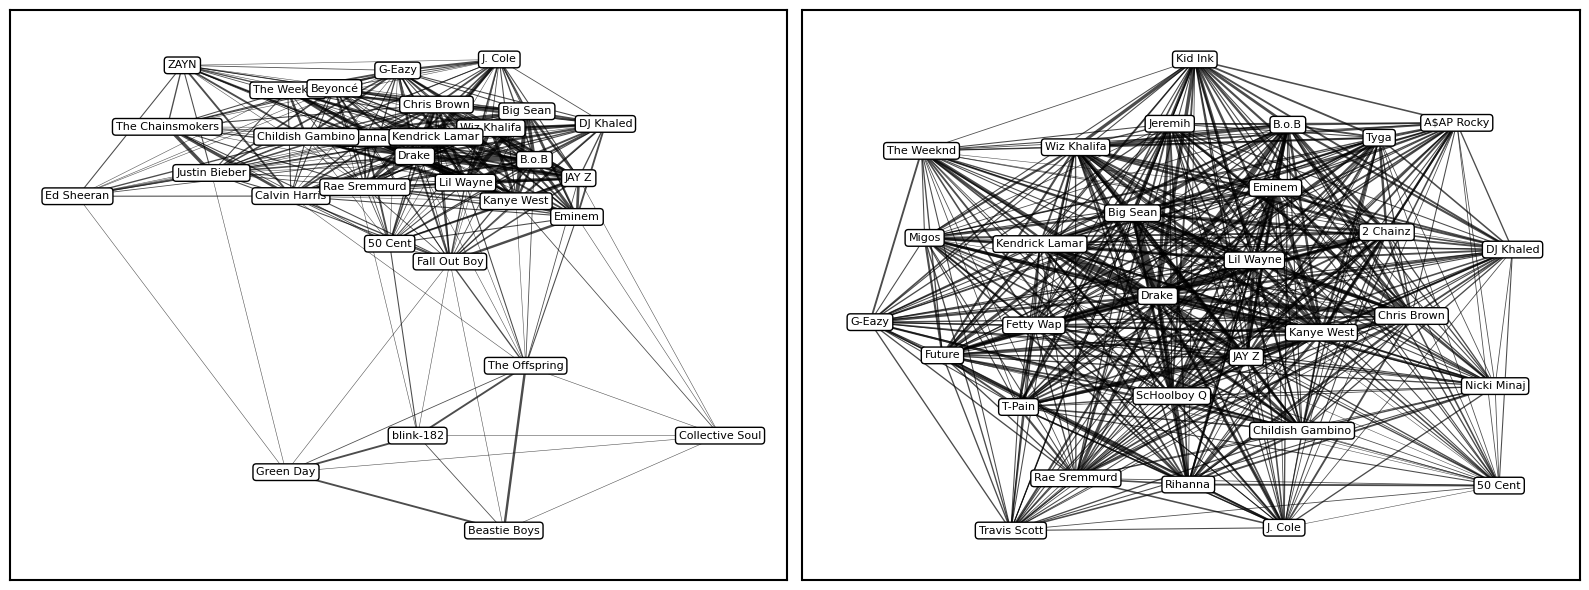

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

top_20_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:30]
top_20_degree_centrality_subgraph = [node for node, _ in top_20_degree_centrality]
top_20_degree_centrality_subgraph = G.subgraph(top_20_degree_centrality_subgraph)

top_20_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:30]
top_20_eigenvector_centrality_subgraph = [node for node, _ in top_20_eigenvector_centrality]
top_20_eigenvector_centrality_subgraph = G.subgraph(top_20_eigenvector_centrality_subgraph)

edge_weights_degree_centrality = [top_20_degree_centrality_subgraph[u][v]['weight'] for u, v in top_20_degree_centrality_subgraph.edges()]
max_weight_degree_centrality = max(edge_weights_degree_centrality) if edge_weights_degree_centrality else 1
normalized_weights_degree_centrality = [w / max_weight_degree_centrality * 5 for w in edge_weights_degree_centrality]

edge_weights_eigencentrality = [top_20_eigenvector_centrality_subgraph[u][v]['weight'] for u, v in top_20_eigenvector_centrality_subgraph.edges()]
max_weight_eigenvector_centrality = max(edge_weights_eigencentrality) if edge_weights_eigencentrality else 1
normalized_weights_eigenvector_centrality = [w / max_weight_eigenvector_centrality * 5 for w in edge_weights_eigencentrality]

pos_eigen_centrality = nx.spring_layout(top_20_degree_centrality_subgraph, seed=42, k=0.3)
pos_weighted_degree_centrality = nx.spring_layout(top_20_eigenvector_centrality_subgraph, seed=42, k=0.3)

nx.draw_networkx_edges(top_20_degree_centrality_subgraph, pos_eigen_centrality, edge_color='black', width=normalized_weights_degree_centrality, ax=axes[0], alpha=0.7)
nx.draw_networkx_labels(top_20_degree_centrality_subgraph, pos_eigen_centrality, font_size=8, verticalalignment='center', ax=axes[0], bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

nx.draw_networkx_edges(top_20_eigenvector_centrality_subgraph, pos_weighted_degree_centrality, edge_color='black', width=normalized_weights_eigenvector_centrality, ax=axes[1], alpha=0.7)
nx.draw_networkx_labels(top_20_eigenvector_centrality_subgraph, pos_weighted_degree_centrality, font_size=8, verticalalignment='center', ax=axes[1], bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("../plots/top-30-eigen-vs-degree-centrality.png", transparent=True)
plt.show()

In [ ]:
def summarize_subgraph(G_sub, name):
    print(f"--- {name} ---")
    print(f"Nodes: {G_sub.number_of_nodes()}")
    print(f"Edges: {G_sub.number_of_edges()}")
    print(f"Average degree: {sum(dict(G_sub.degree()).values()) / G_sub.number_of_nodes():.2f}")
    print(f"Density: {nx.density(G_sub):.4f}")
    print(f"Transitivity (clustering): {nx.transitivity(G_sub):.4f}")
    print(f"Average clustering coefficient: {nx.average_clustering(G_sub):.4f}")
    print(f"Number of connected components: {nx.number_connected_components(G_sub)}")
    print(f"Diameter (if connected): {nx.diameter(G_sub) if nx.is_connected(G_sub) else 'N/A'}")
    print()

summarize_subgraph(top_20_degree_centrality_subgraph, "Top 30 Degree Centrality Subgraph")
summarize_subgraph(top_20_eigenvector_centrality_subgraph, "Top 30 Eigenvector Centrality Subgraph")

overlap = set(top_20_degree_centrality_subgraph.nodes()).intersection(top_20_eigenvector_centrality_subgraph.nodes())
print(f"Node overlap between subgraphs: {len(overlap)} / 30 ({len(overlap)/30*100:.1f}%)")

periphery_deg = nx.periphery(top_20_degree_centrality_subgraph)
periphery_eig = nx.periphery(top_20_eigenvector_centrality_subgraph)

print(f"Peripheral nodes (Degree): {periphery_deg}")
print(f"Peripheral nodes (Eigenvector): {periphery_eig}")


def centralization(G_sub, centrality_func):
    centrality = centrality_func(G_sub)
    max_c = max(centrality.values())
    return sum(max_c - v for v in centrality.values()) / ((len(centrality)-1) * (len(centrality) - 2))

print("Degree Centralization:", centralization(top_20_degree_centrality_subgraph, nx.degree_centrality))
print("Eigenvector Centralization:", centralization(top_20_eigenvector_centrality_subgraph, nx.eigenvector_centrality_numpy))

weights_deg = [d['weight'] for u, v, d in top_20_degree_centrality_subgraph.edges(data=True)]
weights_eig = [d['weight'] for u, v, d in top_20_eigenvector_centrality_subgraph.edges(data=True)]

print(f"Mean edge weight (Degree): {np.mean(weights_deg):.2f}")
print(f"Mean edge weight (Eigenvector): {np.mean(weights_eig):.2f}")

--- Top 30 Degree Centrality Subgraph ---
Nodes: 30
Edges: 294
Average degree: 19.60
Density: 0.6759
Transitivity (clustering): 0.8599
Average clustering coefficient: 0.8312
Number of connected components: 1
Diameter (if connected): 3

--- Top 30 Eigenvector Centrality Subgraph ---
Nodes: 30
Edges: 434
Average degree: 28.93
Density: 0.9977
Transitivity (clustering): 0.9977
Average clustering coefficient: 0.9977
Number of connected components: 1
Diameter (if connected): 2

Node overlap between subgraphs: 18 / 30 (60.0%)
Peripheral nodes (Degree): ['Childish Gambino', 'The Weeknd', 'Collective Soul', 'Beastie Boys', 'ZAYN', 'The Chainsmokers']
Peripheral nodes (Eigenvector): ['50 Cent', 'The Weeknd']
Degree Centralization: 0.006879565143536604
Eigenvector Centralization: 1.4567367207852368e-05
Mean edge weight (Degree): 5.86
Mean edge weight (Eigenvector): 6.46
